## Sentiment Analysis : Alexa Product Review Sentiment Analysis

- This project is created for the Public Relations Department in order to understand if the Customer is satisfied with the product or Not.
- The data consists of product reviews of the 'Amazon Echo' product 'Alexa' collected by the Public Relations Department.
- In this project, Natural language processing (NLP) is used to convert words in vectors(numerical format) build predictive models to perform sentiment analysis on textual data.
- Different Classification algorithms like Naive Bayes, Logistic Regression & Decision Tree Classifier are used to classify the review of the customers into Positive or Negative.

## Dataset Information 

The Dataset consists of 5 features : 
1. rating : rating stars given by the Customer.
2. date : Date on which the review was provided.
3. variation : The varaition in look of the product.
4. verified_reviews : The Review a Customer Wrote.
5. feedback (Output) : 1 : if ratings >= 4 (A positive Review), 0 : if < 4 (A negative review)

## Task 1 : Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Task 2 : Importing the Data

In [2]:
reviews_df = pd.read_csv('amazon_alexa.tsv', sep = '\t')

In [3]:
reviews_df

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


## Task 3 : Exploratory Data Analysis (EDA)

In [4]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3149 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [5]:
reviews_df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


Rating on average is 4.4 : which means the Customers have mostly liked the Product.

Feeback on average is 0.9 i.e, almost 1 : The Customers have given positive reviews.

In [6]:
reviews_df['feedback'].value_counts()

feedback
1    2893
0     257
Name: count, dtype: int64

The dataset is imbalanced : There are more Positive reviews and less negative reviews.

<Axes: >

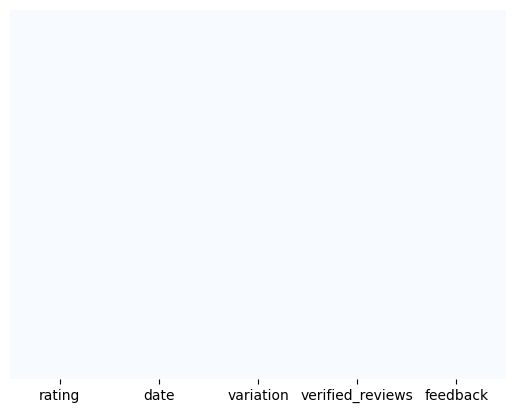

In [7]:
## Checking for missing values.

sns.heatmap(reviews_df.isnull(), yticklabels = False, cbar = False, cmap = 'Blues')

There are no missing values as per the visual.

In [8]:
## Checking for missing values

reviews_df.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    1
feedback            0
dtype: int64

In [9]:
reviews_df[reviews_df['verified_reviews'].isnull()]

,rating,date,variation,verified_reviews,feedback
473,2,29-Jun-18,White,NaN,0


There is 1 missing value in verified_reviews colunm where the feedback is negative.

In [10]:
## Deleting the record where missing value exists as only 1 missing value in present.

reviews_df = reviews_df.dropna().reset_index(drop=True)

In [11]:
reviews_df.shape

(3149, 5)

In [12]:
reviews_df.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

No missing values now.

array([[<Axes: title={'center': 'rating'}>,
        <Axes: title={'center': 'feedback'}>]], dtype=object)

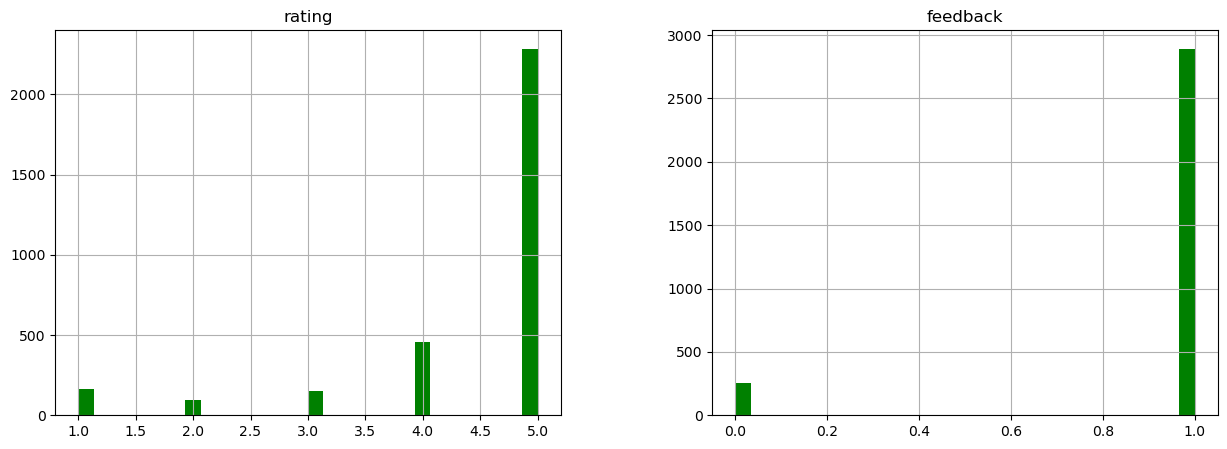

In [13]:
## PLotting Histograms

reviews_df.hist(bins = 30, figsize = (15, 5), color = 'g')

Observations : 

- Most ratings are given as 5.
- Around 3000 out of 3149 Reviews are Positive review.

In [14]:
## Adding a new colounm 'length' that contains the length of each review.

reviews_df['length'] = reviews_df['verified_reviews'].apply(len)

In [15]:
reviews_df

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5
...,...,...,...,...,...,...
3144,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,50
3145,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,135
3146,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,441
3147,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,380


In [16]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3149 entries, 0 to 3148
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3149 non-null   int64 
 1   date              3149 non-null   object
 2   variation         3149 non-null   object
 3   verified_reviews  3149 non-null   object
 4   feedback          3149 non-null   int64 
 5   length            3149 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 147.7+ KB


In [17]:
reviews_df.describe()

,rating,feedback,length
count,3149.000000,3149.000000,3149.000000
mean,4.463957,0.918704,132.090187
std,1.067773,0.273332,182.114569
min,1.000000,0.000000,1.000000
25%,4.000000,1.000000,30.000000
50%,5.000000,1.000000,74.000000
75%,5.000000,1.000000,165.000000
max,5.000000,1.000000,2851.000000


<Axes: ylabel='Frequency'>

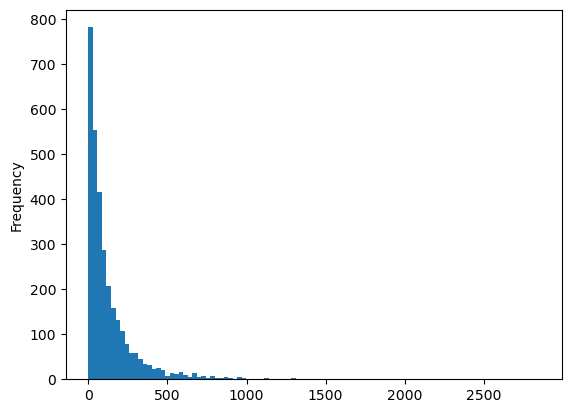

In [18]:
## Plotting histogram for length colunm

reviews_df['length'].plot(bins = 100, kind = 'hist')

Lot of reviws are short reviews, while some reviews do have around 2000 letters.

In [19]:
## Checking for the review of maximum lenght.

reviews_df[reviews_df['length'] == 2851]['verified_reviews'].iloc[0]

"Incredible piece of technology.I have this right center of my living room on an island kitchen counter. The mic and speaker goes in every direction and the quality of the sound is quite good. I connected the Echo via Bluetooth to my Sony soundbar on my TV but find the Echo placement and 360 sound more appealing. It's no audiophile equipment but there is good range and decent bass. The sound is more than adequate for any indoor entertaining and loud enough to bother neighbors in my building. The knob on the top works great for adjusting volume. This is my first Echo device and I would imagine having to press volume buttons (on the Echo 2) a large inconvenience and not as precise. For that alone I would recommend this over the regular Echo (2nd generation).The piece looks quality and is quite sturdy with some weight on it. The rubber material on the bottom has a good grip on the granite counter-- my cat can even rub her scent on it without tipping it over.This order came with a free Phi

In [20]:
## Checking for the review of minimum lenght.

reviews_df[reviews_df['length'] == 1]['verified_reviews'].iloc[0]

'😍'

In [21]:
## Checking for the review of mean lenght.

reviews_df[reviews_df['length'] == 132]['verified_reviews'].iloc[0]

'Nice. It works good.Some times is not easy to recognize your voice and you have to repeat several times, some time almost screaming.'

In [22]:
## creating a dataframe that consists of positive reviews

positive_reviews_df = reviews_df[reviews_df['feedback'] == 1]

In [23]:
positive_reviews_df

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5
...,...,...,...,...,...,...
3144,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,50
3145,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,135
3146,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,441
3147,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,380


In [24]:
## creating a dataframe that consists of positive reviews

negative_reviews_df = reviews_df[reviews_df['feedback'] == 0]

In [25]:
negative_reviews_df

,rating,date,variation,verified_reviews,feedback,length
46,2,30-Jul-18,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0,163
111,2,30-Jul-18,Charcoal Fabric,Sound is terrible if u want good music too get...,0,53
141,1,30-Jul-18,Charcoal Fabric,Not much features.,0,18
162,1,30-Jul-18,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0,87
176,2,30-Jul-18,Heather Gray Fabric,Sad joke. Worthless.,0,20
...,...,...,...,...,...,...
3046,1,30-Jul-18,Black Dot,Echo Dot responds to us when we aren't even ta...,0,120
3047,1,30-Jul-18,White Dot,NOT CONNECTED TO MY PHONE PLAYLIST :(,0,37
3066,2,30-Jul-18,Black Dot,The only negative we have on this product is t...,0,240
3090,1,30-Jul-18,Black Dot,I didn’t order it,0,17


In [26]:
reviews_df['feedback'].value_counts()

feedback
1    2893
0     256
Name: count, dtype: int64

<Axes: xlabel='feedback', ylabel='count'>

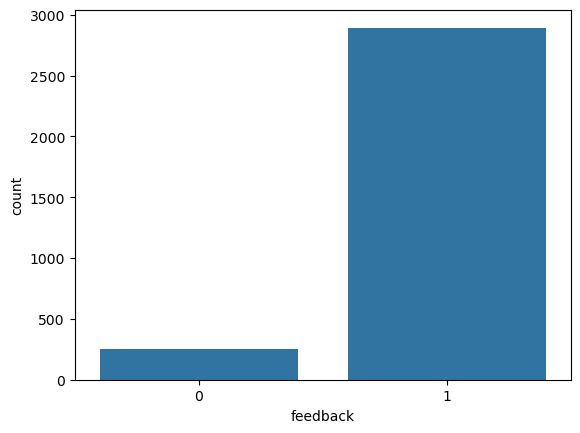

In [27]:
sns.countplot(x = reviews_df['feedback'])

<Axes: xlabel='rating', ylabel='count'>

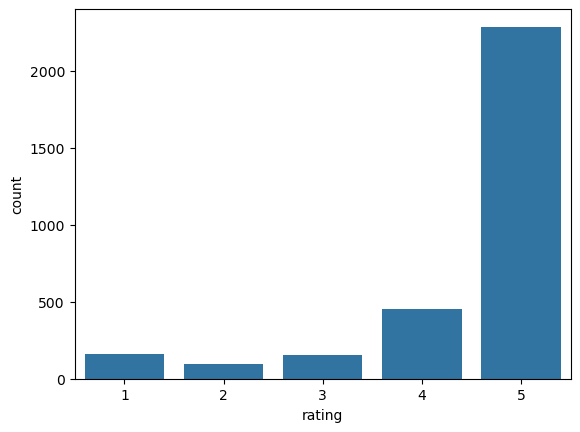

In [28]:
sns.countplot(x = 'rating', data = reviews_df)

C:\Users\Palak\AppData\Local\Temp\ipykernel_7888\2669839797.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'variation', y = 'rating', data = reviews_df, palette = 'deep')


<Axes: xlabel='variation', ylabel='rating'>

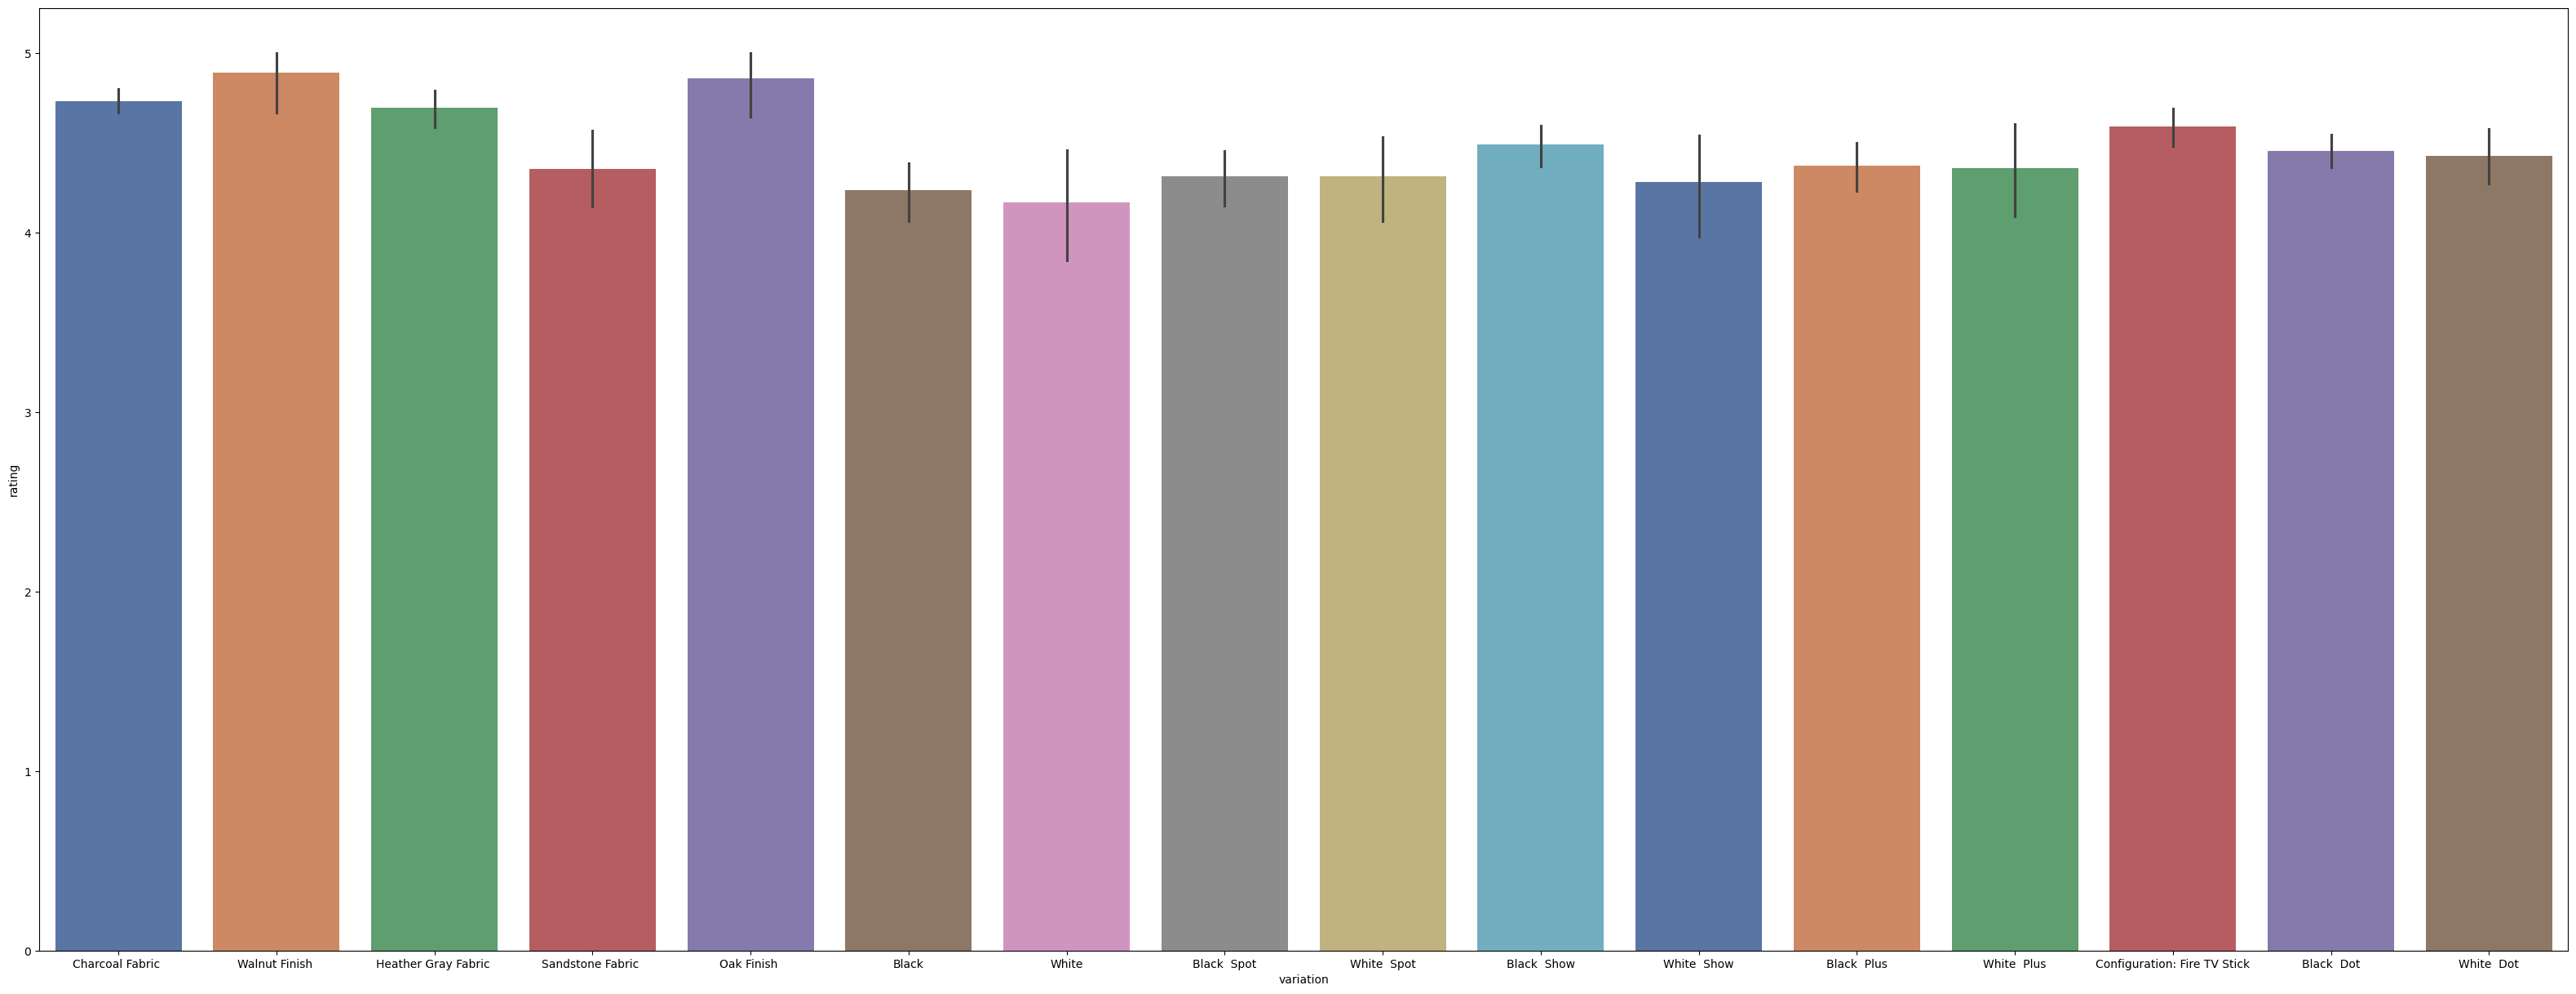

In [29]:
## Checking if 'Variations' has some impact on the feedback(sentiment).

plt.figure(figsize = (40, 15))
sns.barplot(x = 'variation', y = 'rating', data = reviews_df, palette = 'deep')

Most of the variations are given a positive feedback.

The White one is a bit less considered as Positive.

The best considered are Oak and the Walnut finished ones.


In [30]:
## Visualizing the word Cloud (The most common words customers are using in the reviews)

## Converting all reviews to one list of sentences.
sentences = reviews_df['verified_reviews'].to_list()
sentences

['Love my Echo!',
 'Loved it!',
 'Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home.',
 'I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.',
 'Music',
 'I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do.',
 'Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet.',
 "I think this is the 5th one I've

In [31]:
## Converting the list of sentences to one paragraph.

reviews_paragraph = ' '.join(sentences)

In [32]:
reviews_paragraph

'Love my Echo! Loved it! Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home. I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well. Music I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do. Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet. I think this is the 5th one I\'ve purchased. I\'m working on 

## Task 4 : Visualizing the Word Cloud

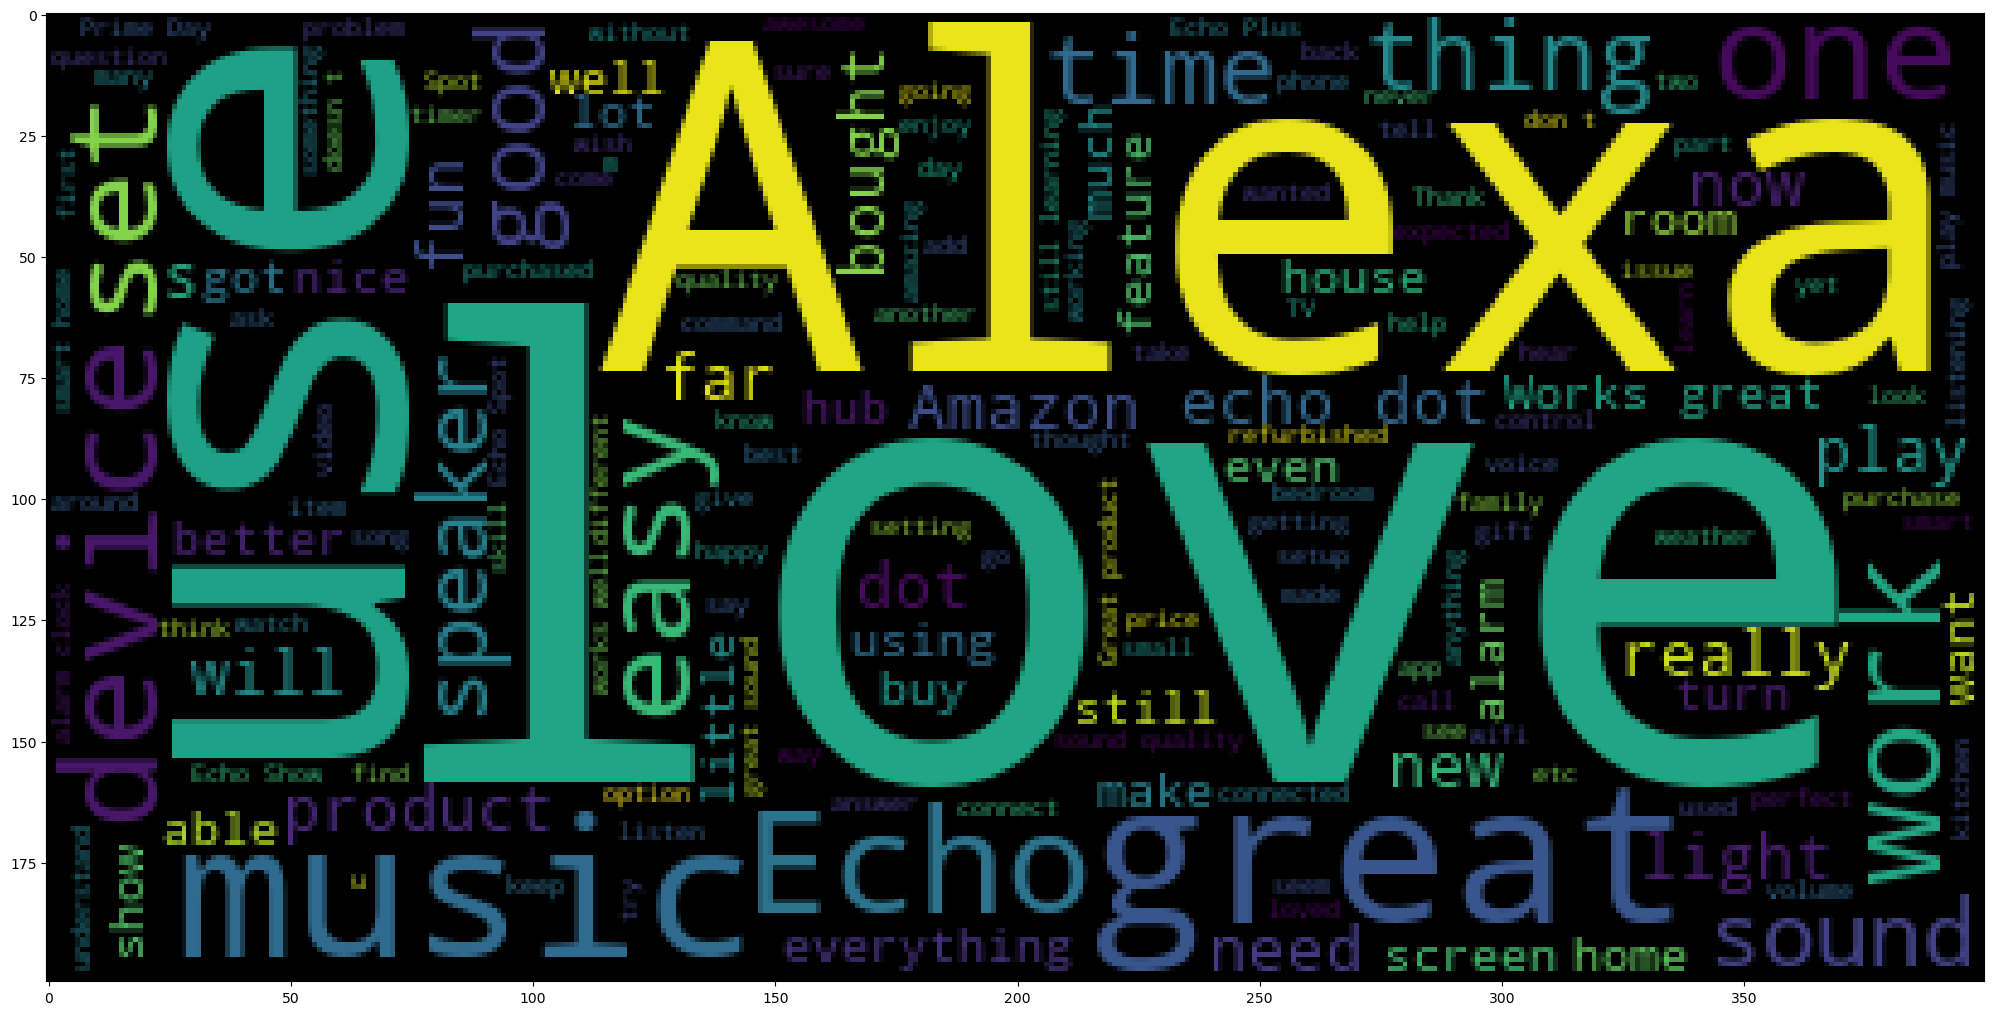

In [33]:
from wordcloud import WordCloud

plt.figure(figsize = (25, 25))
plt.imshow(WordCloud().generate(reviews_paragraph))

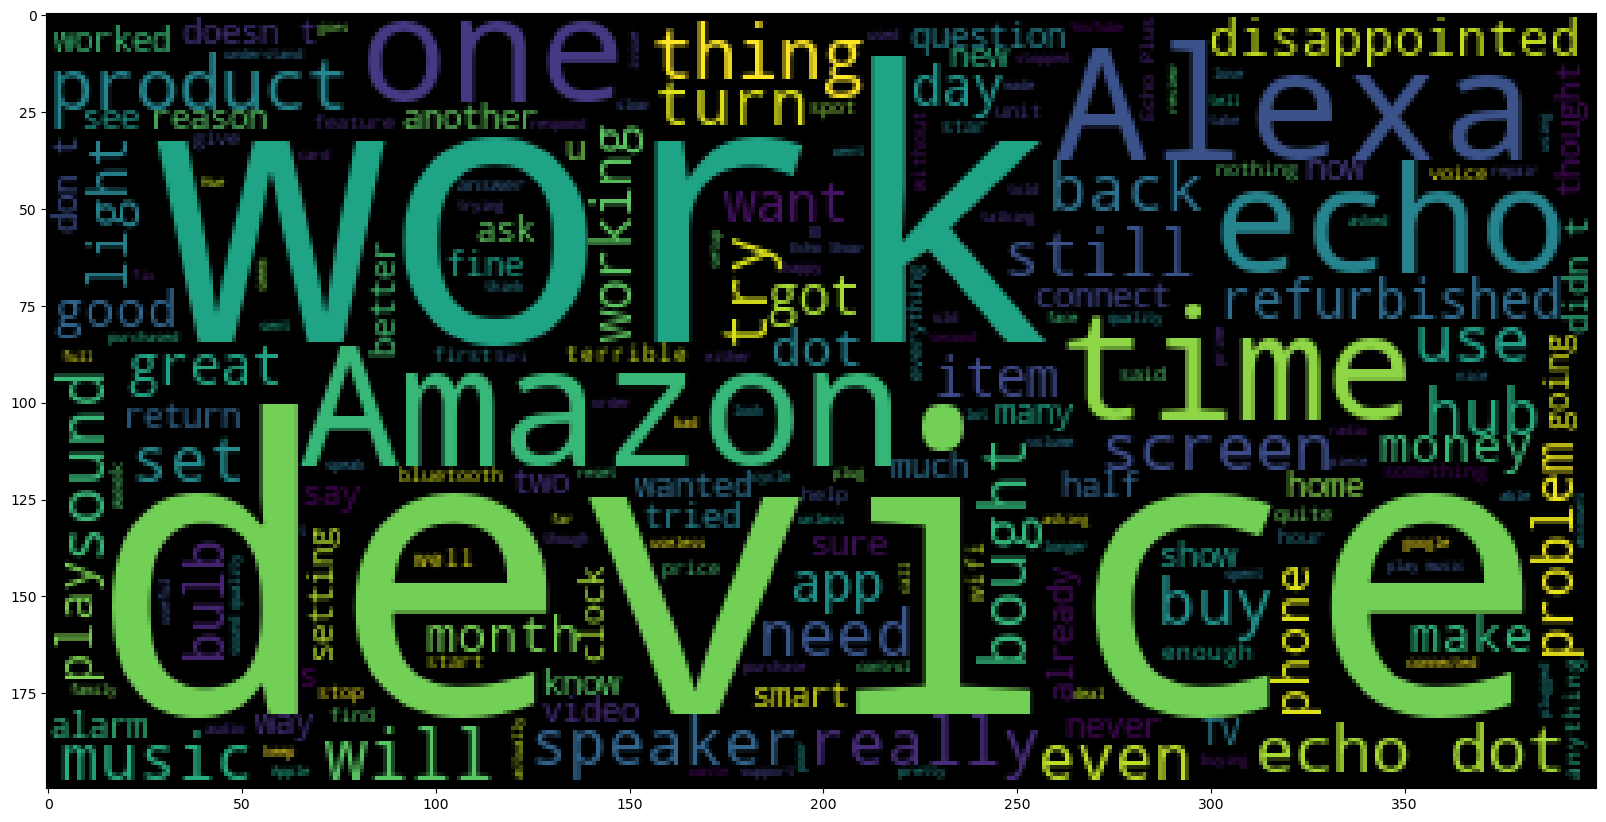

In [34]:
## Plotting the word cloud for negative reviews.

negative_sentences = negative_reviews_df['verified_reviews'].to_list()
negative_sentences_para = ' '.join(negative_sentences)
plt.figure(figsize = (20, 20))
plt.imshow(WordCloud().generate(negative_sentences_para))

Most good words are gone like love, good.
But, there are some words that don't mean much like Amazon, Alexa, device, etc

## Task 5 : Data Cleaning

In [35]:
reviews_df.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


In [36]:
## Droping the Date, length and Rating Features as not required.

reviews_df = reviews_df.drop(['rating', 'date', 'length'], axis = 1)

In [37]:
reviews_df

,variation,verified_reviews,feedback
0,Charcoal Fabric,Love my Echo!,1
1,Charcoal Fabric,Loved it!,1
2,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,Charcoal Fabric,Music,1
...,...,...,...
3144,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3145,Black Dot,"Listening to music, searching locations, check...",1
3146,Black Dot,"I do love these things, i have them running my...",1
3147,White Dot,Only complaint I have is that the sound qualit...,1


In [38]:
## Encoding Variation colunm into numeric values.
## drop_first = True : to avoid the dummy variable trap.
variation_dummy = pd.get_dummies(reviews_df['variation'], drop_first=True).astype(int)
variation_dummy

,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3144,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3145,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3146,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3147,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
reviews_df.drop(['variation'], axis = 1, inplace = True)
reviews_df

,verified_reviews,feedback
0,Love my Echo!,1
1,Loved it!,1
2,"Sometimes while playing a game, you can answer...",1
3,I have had a lot of fun with this thing. My 4 ...,1
4,Music,1
...,...,...
3144,"Perfect for kids, adults and everyone in betwe...",1
3145,"Listening to music, searching locations, check...",1
3146,"I do love these things, i have them running my...",1
3147,Only complaint I have is that the sound qualit...,1


In [40]:
## Concatenating reviews_df with encoded varaitions.

reviews_df = pd.concat([reviews_df, variation_dummy], axis = 1)
reviews_df

,verified_reviews,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,Love my Echo!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,Loved it!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,"Sometimes while playing a game, you can answer...",1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,I have had a lot of fun with this thing. My 4 ...,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,Music,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3144,"Perfect for kids, adults and everyone in betwe...",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3145,"Listening to music, searching locations, check...",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3146,"I do love these things, i have them running my...",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3147,Only complaint I have is that the sound qualit...,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


## Task 6 : Text Preprocessing

In [41]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Palak\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [42]:
## Function to remove punctuations & stopwords.

import string

def data_cleaning(data) : 
    text_punc_removed = [char for char in data if char not in string.punctuation]
    text_punc_removed_joined = ''.join(text_punc_removed)
    text_punc_removed_joined_cleaned = [word for word in text_punc_removed_joined.split() if word.lower() not in stopwords.words('english')]
    return text_punc_removed_joined_cleaned

In [43]:
reviews_df_cleaned = reviews_df['verified_reviews'].apply(data_cleaning)

In [44]:
reviews_df_cleaned

0                                            [Love, Echo]
1                                                 [Loved]
2       [Sometimes, playing, game, answer, question, c...
3       [lot, fun, thing, 4, yr, old, learns, dinosaur...
4                                                 [Music]
                              ...                        
3144                    [Perfect, kids, adults, everyone]
3145    [Listening, music, searching, locations, check...
3146    [love, things, running, entire, home, TV, ligh...
3147    [complaint, sound, quality, isnt, great, mostl...
3148                                               [Good]
Name: verified_reviews, Length: 3149, dtype: object

In [45]:
print(reviews_df_cleaned[3])

['lot', 'fun', 'thing', '4', 'yr', 'old', 'learns', 'dinosaurs', 'control', 'lights', 'play', 'games', 'like', 'categories', 'nice', 'sound', 'playing', 'music', 'well']


In [46]:
reviews_df['verified_reviews'][3]

'I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.'

In [47]:
## Applying count vectorizer

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer = data_cleaning) ## Using data_cleaning pipeline, after cleaning the data, vectorization will be applied.
reviews_count_vectorizer = vectorizer.fit_transform(reviews_df['verified_reviews'])

In [48]:
print(vectorizer.get_feature_names_out()) ## we have every single unique word after cleaning.

['072318' '1' '10' ... '😬' '😳' '🤓']


In [49]:
print(reviews_count_vectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [50]:
reviews_count_vectorizer.shape

(3149, 5211)

In [51]:
## Getting rid of verified_reviews and get the vectors in place of that

reviews_df.drop(['verified_reviews'], axis = 1, inplace = True)

In [52]:
reviews_df

,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3144,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3145,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3146,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3147,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [53]:
reviews = pd.DataFrame(reviews_count_vectorizer.toarray())

In [54]:
reviews.head()

,0,1,2,3,4,5,6,7,8,9,...,5201,5202,5203,5204,5205,5206,5207,5208,5209,5210
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
reviews.shape

(3149, 5211)

In [56]:
reviews_df = pd.concat([reviews_df, reviews], axis=1)

In [57]:
reviews_df.shape

(3149, 5227)

In [58]:
reviews_df.head()

,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,...,5201,5202,5203,5204,5205,5206,5207,5208,5209,5210
0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Task 7 : Preparing Train and Test data

In [59]:
X = reviews_df.drop(['feedback'], axis = 1)

In [60]:
y = reviews_df['feedback']

In [61]:
X.columns = X.columns.astype(str)

In [62]:
X.shape

(3149, 5226)

In [63]:
y.shape

(3149,)

## Task 8 : Balancing the Dataset

In [64]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

In [86]:
X.shape, y.shape

((5786, 5226), (5786,))

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

## Task 9 : Training & Evaluating the Naive Bayes Classifier.

In [66]:
from sklearn.naive_bayes import MultinomialNB

naive_bayes_model = MultinomialNB()

In [67]:
naive_bayes_model.fit(X_train, y_train)

MultinomialNB()

In [68]:
## Evaluating the model using confusion matrix & classificatin_report.

from sklearn.metrics import confusion_matrix, classification_report

y_pred_train = naive_bayes_model.predict(X_train)
y_pred_test = naive_bayes_model.predict(X_test)

In [69]:
y_pred_train

array([1, 1, 0, ..., 0, 1, 0], dtype=int64)

<Axes: >

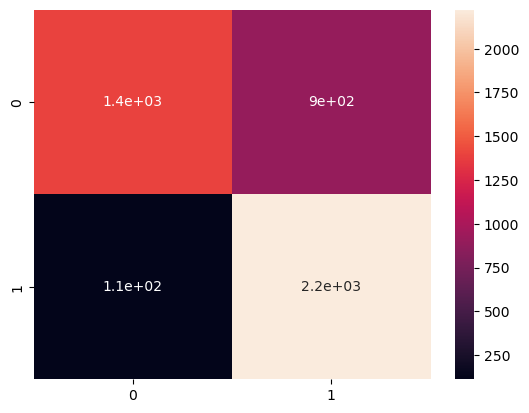

In [70]:
cm_train = confusion_matrix(y_train, y_pred_train)
sns.heatmap(cm_train, annot=True)

Most of the data has been classified correctly.

<Axes: >

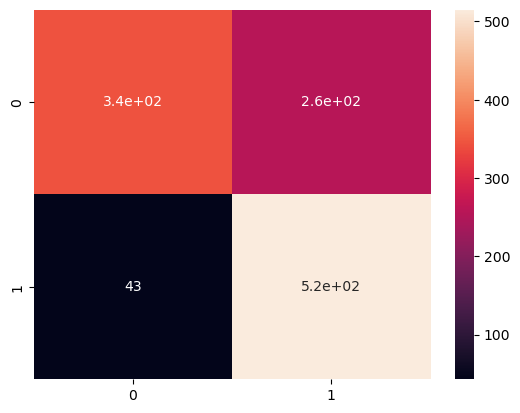

In [71]:
cm_test = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm_test, annot=True)

As we have a lot of data on positive feedback, hence the data is imbalanced so the positive feedbacks are classified correctly, but, negatives aren't.

In [72]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.89      0.57      0.70       600
           1       0.67      0.92      0.78       558

    accuracy                           0.74      1158
   macro avg       0.78      0.75      0.74      1158
weighted avg       0.78      0.74      0.73      1158



## Task 10 : Training & Evaluating the Logistic Regression model.

In [73]:
from sklearn.linear_model import LogisticRegression

logistic_regression_model = LogisticRegression()

In [74]:
logistic_regression_model.fit(X_train, y_train)

LogisticRegression()

In [75]:
logistic_y_pred_test = logistic_regression_model.predict(X_test)

In [76]:
logistic_y_pred_test

array([1, 0, 0, ..., 0, 1, 1], dtype=int64)

<Axes: >

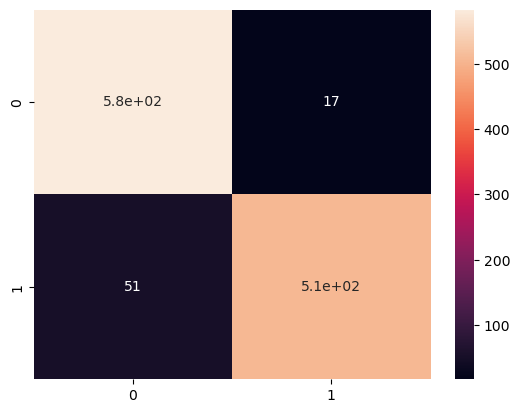

In [77]:
cm_logistic = confusion_matrix(y_test, logistic_y_pred_test)
sns.heatmap(cm_logistic, annot=True)

In [78]:
from sklearn.metrics import accuracy_score
print('Accuracy : {} %'.format(100 * accuracy_score(logistic_y_pred_test, y_test)))

Accuracy : 94.12780656303973 %


In [79]:
print(classification_report(y_test, logistic_y_pred_test))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       600
           1       0.97      0.91      0.94       558

    accuracy                           0.94      1158
   macro avg       0.94      0.94      0.94      1158
weighted avg       0.94      0.94      0.94      1158



Improved the f1-score from 48 to 94 by oversampling the data.

## Task 11 : Training & Evaluating Random Forest Classifier.

In [80]:
from sklearn.ensemble import RandomForestClassifier

In [81]:
rf_model = RandomForestClassifier()

In [82]:
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [83]:
rf_pred = rf_model.predict(X_test)

<Axes: >

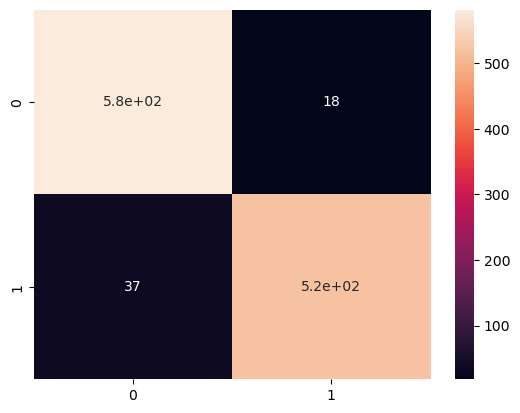

In [84]:
rf_cm = confusion_matrix(y_test, rf_pred)
sns.heatmap(rf_cm, annot=True)

In [85]:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       600
           1       0.97      0.93      0.95       558

    accuracy                           0.95      1158
   macro avg       0.95      0.95      0.95      1158
weighted avg       0.95      0.95      0.95      1158



Imporved the f1-score from 48 to 93 by oversampling.